# Sales Analysis
#### Import Necessary Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Merging 12 months of sales data into a single file

In [18]:
base_dir = os.path.abspath("...")
data_dir = os.path.join(base_dir, "data")

files_names = [os.path.join(data_dir, i) for i in os.listdir(data_dir) if i.endswith(".csv")]

In [19]:
df = pd.concat(map(pd.read_csv, files_names), ignore_index=True)

In [21]:
df.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [22]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Clean up the data!

#### Drop rows of NAN

In [37]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Find 'Or' and delete it

In [46]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]


#### Convert columns to the correct type

In [50]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])


## Augment data with additional columns

### Task 2: Add Month Column

In [47]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [58]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99


#### Task 4: Add a city colun

In [73]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(',')[-1].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [59]:
results = all_data.groupby('Month').sum()

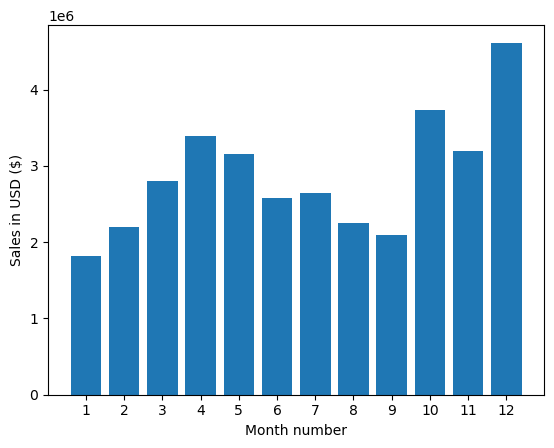

In [61]:
months = range(1,13)
plt.bar(months, results["Sales"])

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel("Month number")

plt.show()

#### Question 2: What city had the highes number of sales?

In [74]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


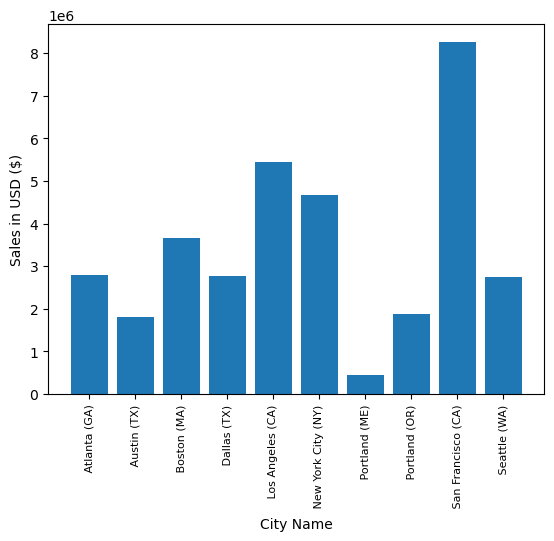

In [76]:

plt.bar(results.index, results["Sales"])

plt.xticks(results.index, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel("City Name")

plt.show()

#### Question 3: What time should we display advertisement to maximize likehood of custumer's buying products?

In [79]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [82]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

In [84]:
results = all_data.groupby(["Hour"]).count()

Answer: My recommendation is to run the advertising around 11 am (11) or 7 pm( 19 )

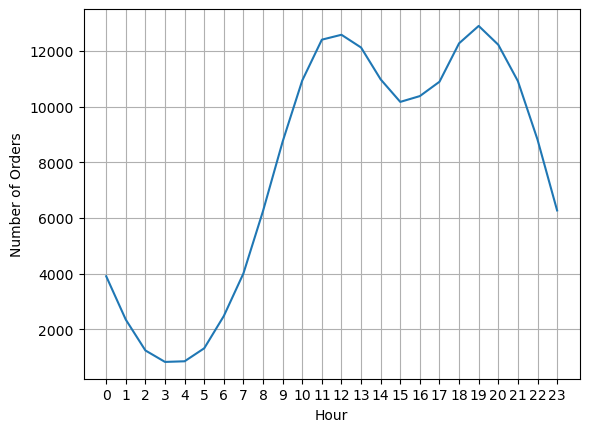

In [89]:
plt.plot(results.index, results["Sales"])
plt.xticks(results.index)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [103]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_12788\2719567245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [108]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [112]:
product_group = all_data.groupby('Product')
quantity_order = product_group.sum()['Quantity Ordered']

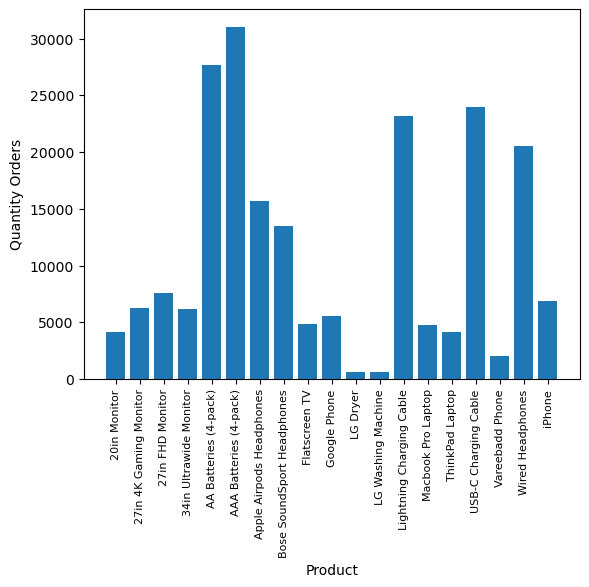

In [116]:
plt.bar(quantity_order.index, quantity_order.values)

plt.xticks(quantity_order.index, rotation='vertical', size=8)
plt.ylabel('Quantity Orders')
plt.xlabel("Product")

plt.show()


hypothesis: AAA Batteries are the most ordered product because they are cheap products

C:\Users\Marcos\AppData\Local\Temp\ipykernel_12788\2576508665.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(quantity_order.index, rotation='vertical', size=8)


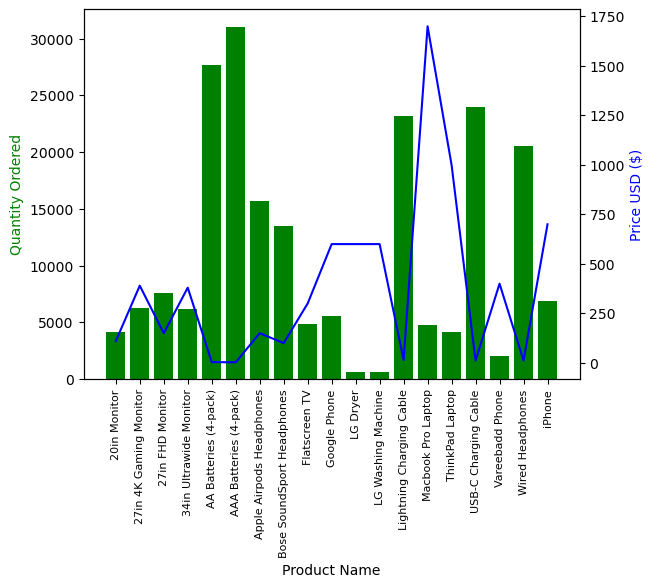

In [132]:
prices = all_data.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(quantity_order.index, quantity_order.values, color='g')
ax2.plot(prices.index, prices.values, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Price USD ($)", color='b')
ax1.set_xticklabels(quantity_order.index, rotation='vertical', size=8)
plt.show()


When prices are high, the orders are low, and when the prices are low orders are high.